# LAB 1

In [1]:
import numpy as np

In [9]:
# activation function

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [10]:
# Input and output for XOR gate
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

In [11]:
# defined architecture
input_layer_neurons = 2    
hidden_layer_neurons = 4   
output_neurons = 1  

In [5]:
# initialize weights and biases using Xavier initialization
np.random.seed(42
               )
weights_input_hidden = np.random.randn(input_layer_neurons, hidden_layer_neurons) * np.sqrt(2 / input_layer_neurons)
bias_hidden = np.zeros((1, hidden_layer_neurons))
weights_hidden_output = np.random.randn(hidden_layer_neurons, output_neurons) * np.sqrt(2 / hidden_layer_neurons)
bias_output = np.zeros((1, output_neurons))

# Learning rate
lr = 0.009

# epochs and losses
epochs = 20000
losses = []

In [6]:
# Training the network
for epoch in range(epochs):
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # error
    error = y - predicted_output
    loss = np.mean(error**2)
    losses.append(loss)

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * relu_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * lr
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
    
    weights_input_hidden += X.T.dot(d_hidden_layer) * lr
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

    # Print loss 
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 0.31152038919874975
Epoch 500, Loss: 0.2514872075095409
Epoch 1000, Loss: 0.25013667427257197
Epoch 1500, Loss: 0.24940135667179092
Epoch 2000, Loss: 0.24858487380378377
Epoch 2500, Loss: 0.2471732849414031
Epoch 3000, Loss: 0.24379862583655637
Epoch 3500, Loss: 0.23568292183068543
Epoch 4000, Loss: 0.22205650714561964
Epoch 4500, Loss: 0.19731507715874286
Epoch 5000, Loss: 0.16004178732408902
Epoch 5500, Loss: 0.13248469012148187
Epoch 6000, Loss: 0.108107166614657
Epoch 6500, Loss: 0.08684949964756082
Epoch 7000, Loss: 0.06925185103525784
Epoch 7500, Loss: 0.0554037690952613
Epoch 8000, Loss: 0.044783705289471745
Epoch 8500, Loss: 0.03673592430439947
Epoch 9000, Loss: 0.030597259672751915
Epoch 9500, Loss: 0.025880465969123818
Epoch 10000, Loss: 0.02217739245357645
Epoch 10500, Loss: 0.019241694400382394
Epoch 11000, Loss: 0.016883881931861876
Epoch 11500, Loss: 0.014957123562283247
Epoch 12000, Loss: 0.013371299287258127
Epoch 12500, Loss: 0.01204292686644684
Epoch 13

In [7]:
print("Trained XOR Gate Outputs:")

for i in predicted_output:
    if i >= 0.5:
        print(1)
    else:
        print(0)

Trained XOR Gate Outputs:
0
1
1
0


Text(0.5, 1.0, 'Loss Curve')

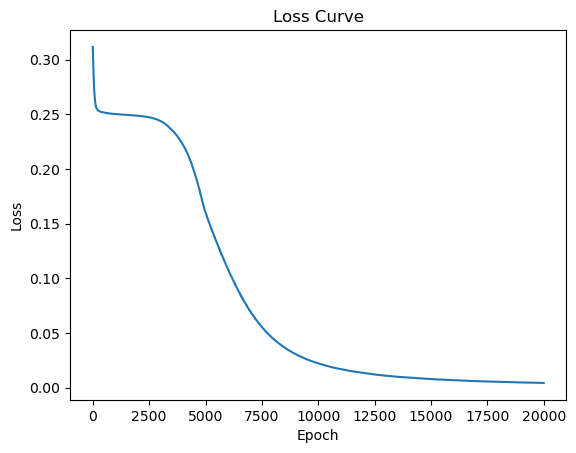

In [8]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')